<a href="https://colab.research.google.com/github/hidensuport/Hello-story-/blob/master/inclass3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [4]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [5]:
cd

/root


In [6]:
df = pd.read_csv("/content/gdrive/MyDrive/fraudTest.csv")

In [7]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [8]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

In [9]:
df_select.columns

Index(['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud'], dtype='object')

In [10]:
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])

<ipython-input-10-99f721e4ce0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

<ipython-input-12-fa4370ef92e9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


In [13]:
X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.3)

In [27]:
X

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,333497,25,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,302,33,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,34496,53,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,54767,15,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,1126,17,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,43.77,519,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0
555715,111.84,28739,9,0,0,0,0,0,0,0,1,0,0,0,0,0,0
555716,86.88,3684,15,0,0,0,0,0,0,0,1,0,0,0,0,0,0
555717,7.99,129,24,0,0,0,0,0,0,0,0,0,0,0,0,0,1


#2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [14]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state = 0)
ros.fit(X, y)
over_x, over_y = ros.fit_resample(X, y)
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler(random_state = 0 )
rus.fit(X, y)
under_x, under_y = rus.fit_resample(X, y)
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
smote_x, smote_y = oversample.fit_resample(X, y)

# 3.) Train three logistic regression models

In [15]:
from sklearn.linear_model import LogisticRegression
log_reg1 = LogisticRegression().fit(over_x, over_y )
log_reg2 = LogisticRegression().fit(under_x, under_y)
log_reg3 = LogisticRegression().fit(smote_x, smote_y)


In [16]:
ros1 = log_reg1.predict(x_test)
rus1 = log_reg2.predict(x_test)

In [17]:
smote1 = log_reg3.predict(x_test)

# 5.) Which performed best in Out of Sample metrics?

In [18]:
from sklearn import metrics
ros_cm = metrics.confusion_matrix(y_test, ros1)
print(ros_cm)
TPR = ros_cm[0,0]/(ros_cm[0,0] + ros_cm[0,1])
TNR = ros_cm[1,1]/(ros_cm[1,1] + ros_cm[1,0])
print("TPR is:{} and TNR is:{}".format(TPR, TNR))

[[135284  30776]
 [   152    504]]
TPR is:0.8146693966036372 and TNR is:0.7682926829268293


In [19]:
from sklearn import metrics
rus_cm = metrics.confusion_matrix(y_test, rus1)
print(rus_cm)
TPR = rus_cm[0,0]/(rus_cm[0,0] + rus_cm[0,1])
TNR = rus_cm[1,1]/(rus_cm[1,1] + rus_cm[1,0])
print("TPR is:{} and TNR is:{}".format(TPR, TNR))

[[135670  30390]
 [   153    503]]
TPR is:0.8169938576418162 and TNR is:0.7667682926829268


In [20]:
from sklearn import metrics
smote1_cm = metrics.confusion_matrix(y_test, smote1)
print(smote1_cm)
TPR = smote1_cm[0,0]/(smote1_cm[0,0] + smote1_cm[0,1])
TNR = smote1_cm[1,1]/(smote1_cm[1,1] + smote1_cm[1,0])
print("TPR is:{} and TNR is:{}".format(TPR, TNR))

[[158000   8060]
 [   171    485]]
TPR is:0.9514633265084909 and TNR is:0.739329268292683


# 6.) Pick two features and plot the two classes before and after SMOTE

In [30]:
import matplotlib.pyplot as plt
raw_temp = pd.concat([X_train, y_train], axis=1)

<function matplotlib.pyplot.show(*args, **kw)>

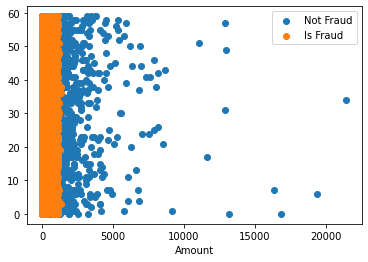

In [31]:
plt.scatter(raw_temp[raw_temp["is_fraud"] ==0]["amt"], 
            raw_temp[raw_temp["is_fraud"] ==0]["time_var"])
plt.scatter(raw_temp[raw_temp["is_fraud"] ==1]["amt"], 
            raw_temp[raw_temp["is_fraud"] ==1]["time_var"])
plt.legend(["Not Fraud","Is Fraud"])
plt.xlabel("Amount")
plt.show

In [34]:
after_temp = pd.concat([smote_x, smote_y], axis=1)

<function matplotlib.pyplot.show(*args, **kw)>

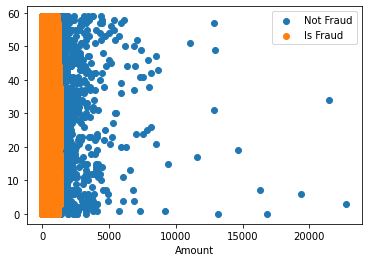

In [35]:
plt.scatter(after_temp[after_temp["is_fraud"] ==0]["amt"], 
            after_temp[after_temp["is_fraud"] ==0]["time_var"])
plt.scatter(after_temp[after_temp["is_fraud"] ==1]["amt"], 
            after_temp[after_temp["is_fraud"] ==1]["time_var"])
plt.legend(["Not Fraud","Is Fraud"])
plt.xlabel("Amount")
plt.show